# Importing Libraries

In [1]:
#from IPhython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
%config InlineBakend.figure_format = "retina"
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency, chi2
import statsmodels.stats.api as sms
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.mosaicplot import mosaic
from textwrap import wrap

# EDA

# Loading data

In [3]:
plt.style.use("fivethirtyeight")
sns.set_style("whitegrid")
#pd.set_option("precision", 2)
# five_thirty_eight = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"]
# sns.set_palette(five_thirty_eight)



In [4]:
data = pd.read_csv('../data/Admission_Predict_ver1.1.csv')
print("DataFrame shape: ", data.shape)
display(data)

DataFrame shape:  (500, 9)


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

In [5]:
data= data.drop(["Serial No."], axis=1)
data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','LOR ':'LOR', 'Chance of Admit ':'Chance'}, inplace=True)
data


GRE  TOEFL  UnivRating  SOP  LOR  CGPA  Research  Chance
0    337    118           4  4.5  4.5  9.65         1    0.92
1    324    107           4  4.0  4.5  8.87         1    0.76
2    316    104           3  3.0  3.5  8.00         1    0.72
3    322    110           3  3.5  2.5  8.67         1    0.80
4    314    103           2  2.0  3.0  8.21         0    0.65
..   ...    ...         ...  ...  ...   ...       ...     ...
495  332    108           5  4.5  4.0  9.02         1    0.87
496  337    117           5  5.0  5.0  9.87         1    0.96
497  330    120           5  4.5  5.0  9.56         1    0.93
498  312    103           4  4.0  5.0  8.43         0    0.73
499  327    113           4  4.5  4.5  9.04         0    0.84

[500 rows x 8 columns]

In [6]:
display(data.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRE         500 non-null    int64  
 1   TOEFL       500 non-null    int64  
 2   UnivRating  500 non-null    int64  
 3   SOP         500 non-null    float64
 4   LOR         500 non-null    float64
 5   CGPA        500 non-null    float64
 6   Research    500 non-null    int64  
 7   Chance      500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


None

In [7]:
data.describe()

GRE       TOEFL  UnivRating         SOP        LOR        CGPA  \
count  500.000000  500.000000  500.000000  500.000000  500.00000  500.000000   
mean   316.472000  107.192000    3.114000    3.374000    3.48400    8.576440   
std     11.295148    6.081868    1.143512    0.991004    0.92545    0.604813   
min    290.000000   92.000000    1.000000    1.000000    1.00000    6.800000   
25%    308.000000  103.000000    2.000000    2.500000    3.00000    8.127500   
50%    317.000000  107.000000    3.000000    3.500000    3.50000    8.560000   
75%    325.000000  112.000000    4.000000    4.000000    4.00000    9.040000   
max    340.000000  120.000000    5.000000    5.000000    5.00000    9.920000   

         Research     Chance  
count  500.000000  500.00000  
mean     0.560000    0.72174  
std      0.496884    0.14114  
min      0.000000    0.34000  
25%      0.000000    0.63000  
50%      1.000000    0.72000  
75%      1.000000    0.82000  
max      1.000000    0.97000

In [8]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())


Rows     : 500
Columns  : 8

Features     : ['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance']

Missing values    : 0

Unique values :  
 GRE            49
TOEFL          29
UnivRating      5
SOP             9
LOR             9
CGPA          184
Research        2
Chance         61
dtype: int64


## Check for duplicates

In [9]:
data.duplicated().sum()
#data= data.drop_duplicates()

0

There are no duplicates in our dataset

## Check and deal with NaN values.

In [10]:
data.isna().sum()

GRE           0
TOEFL         0
UnivRating    0
SOP           0
LOR           0
CGPA          0
Research      0
Chance        0
dtype: int64

There are no null values in our dataset

## Check for outliers

In [11]:
def outlier(df):
    out1=[]
    for col in df.columns:
        outliers =[]
        mean = df[col].mean()
        std = df[col].std()
        for i in df[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [12]:
out = outlier(data)

j = 0
columns = data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]= data[columns[j]].replace(val,np.nan)
    j =j+1
    
data.dropna(axis = 0,inplace =True)

There are 9 outliers in GRE feature
There are 9 outliers in TOEFL feature
There are 0 outliers in UnivRating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR feature
There are 9 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance feature


Most frequent GRE value is: 312.0
Mean of GRE is: 315.67083333333335
Median of GRE is: 316.0


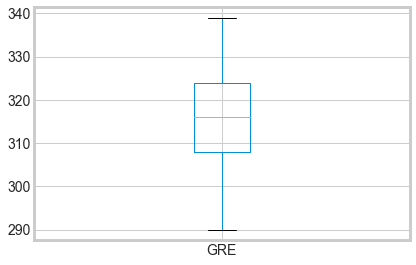

In [13]:
data.boxplot(column=["GRE"])
most_freq_gre = data["GRE"].value_counts().idxmax()
print('Most frequent GRE value is:', most_freq_gre)
mean_gre = np.mean(data['GRE'])
print('Mean of GRE is:', mean_gre)
median_gre = np.nanmedian(data['GRE'])
print('Median of GRE is:', median_gre)


Most frequent TOEFL value is: 110.0
Mean of TOEFL is: 106.78125
Median of TOEFL is: 106.0


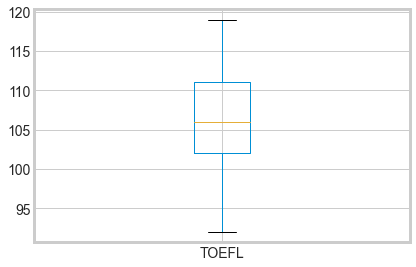

In [14]:
data.boxplot(column=["TOEFL"])
most_freq_gre = data["TOEFL"].value_counts().idxmax()
print('Most frequent TOEFL value is:', most_freq_gre)
mean_gre = np.mean(data['TOEFL'])
print('Mean of TOEFL is:', mean_gre)
median_gre = np.nanmedian(data['TOEFL'])
print('Median of TOEFL is:', median_gre)

Most frequent CGPA value is: 8.0
Mean of CGPA is: 8.532645833333332
Median of CGPA is: 8.54


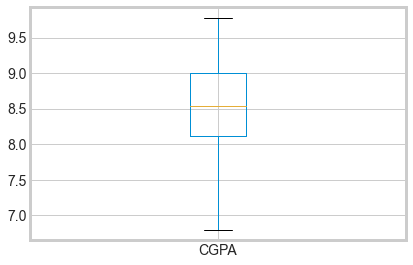

In [15]:
data.boxplot(column=["CGPA"])
most_freq_gre = data["CGPA"].value_counts().idxmax()
print('Most frequent CGPA value is:', most_freq_gre)
mean_gre = np.mean(data['CGPA'])
print('Mean of CGPA is:', mean_gre)
median_gre = np.nanmedian(data['CGPA'])
print('Median of CGPA is:', median_gre)

Maybe nothing to be much concerned about.

## Correlation analysis

In [16]:
#corr = round(data.corr(),2)
#fig, ax = plt.subplots(dpi=100)
#sns.heatmap(corr, annot=True)
#plt.show()

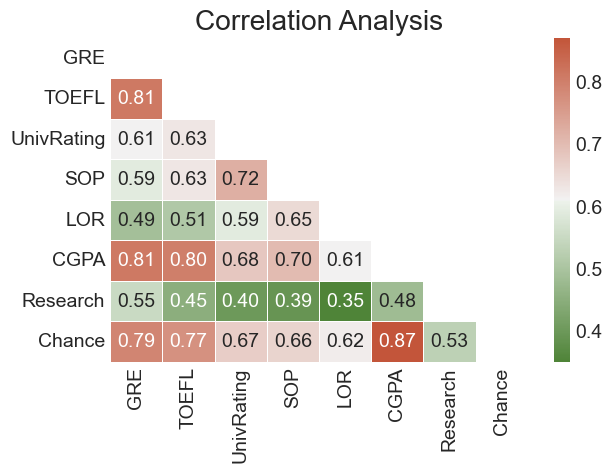

In [17]:
corr2 = round(data.corr(),2)
fig, ax = plt.subplots(dpi=100)

dropSelf = np.zeros_like(corr2)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(120, 20, as_cmap=True)

sns.heatmap(corr2, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Correlation Analysis');

In [18]:
### #corr3 = round(data.corr(),2)
#fig, ax = plt.subplots(figsize=(15, 10))

#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#dropSelf = np.zeros_like(corr)
#dropSelf[np.triu_indices_from(dropSelf)] = True
#colormap = sns.diverging_palette(220, 10, as_cmap=True)

#sns.heatmap(corr3, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
#plt.title('Correlation Analysis');


## Univariate Analysis
We will observ every variable, one by one, to understand its distribution

### GRE

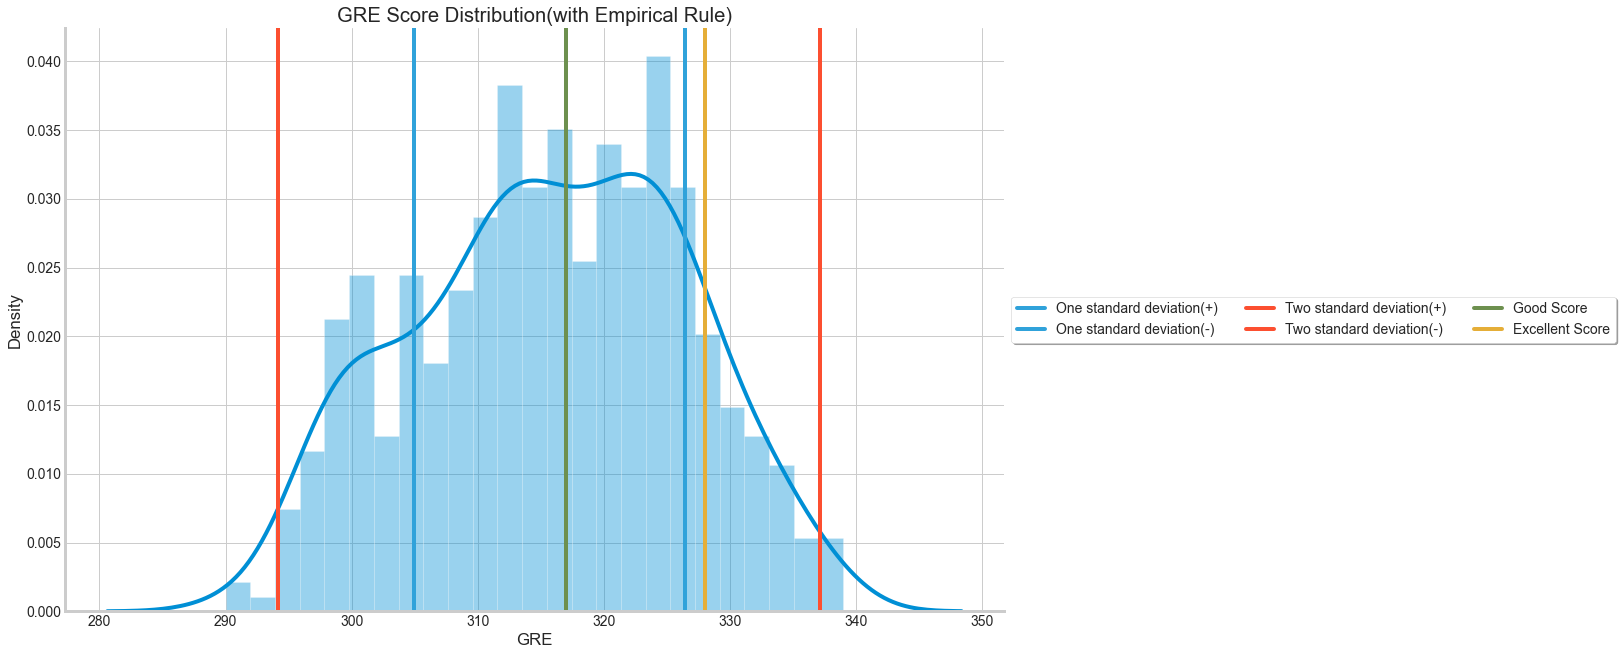

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.GRE,bins=25,ax=ax)
sns.despine()
std = data.GRE.std()
mean = data.GRE.mean()

#Limit lines
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

plt.axvline(317,  label='Good Score',c='#6d904f')
plt.axvline(328,  label='Excellent Score',c='#e5ae38')

#Title and legend
plt.title("GRE Score Distribution(with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fancybox=True, shadow=True);

### TOEFL

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


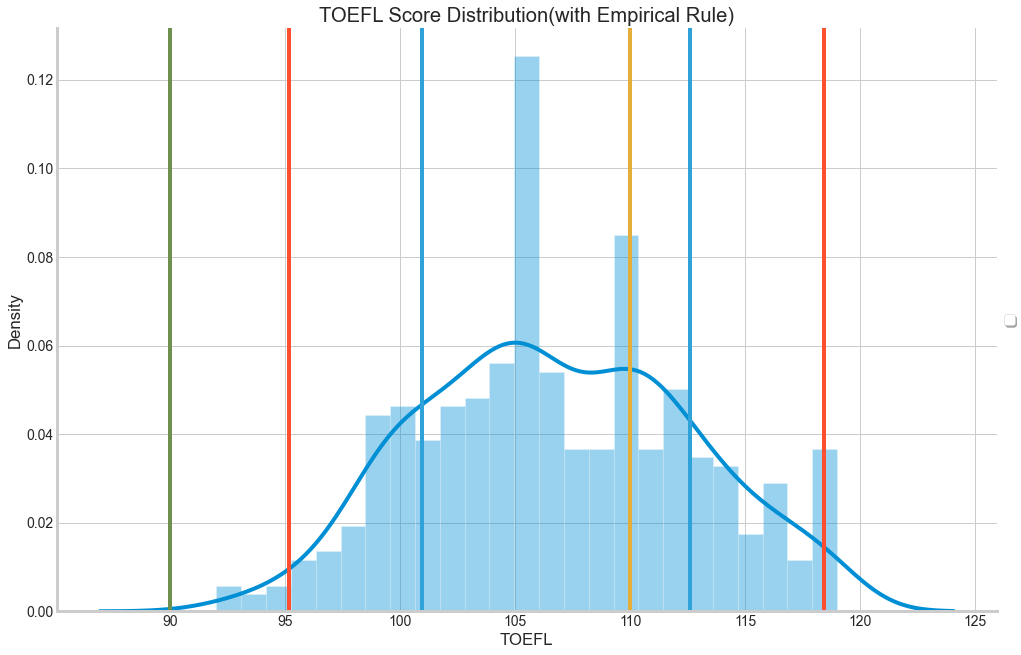

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.TOEFL,bins=25,ax=ax)
sns.despine()
std = data.TOEFL.std()

#Title and legend
plt.title("TOEFL Score Distribution(with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3, fancybox=True, shadow=True);mean = data.TOEFL.mean()


#Limit lines
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

plt.axvline(90,  label='Good Score',c='#6d904f')
plt.axvline(110,  label='Excellent Score',c='#e5ae38')

### University Rating Distribution

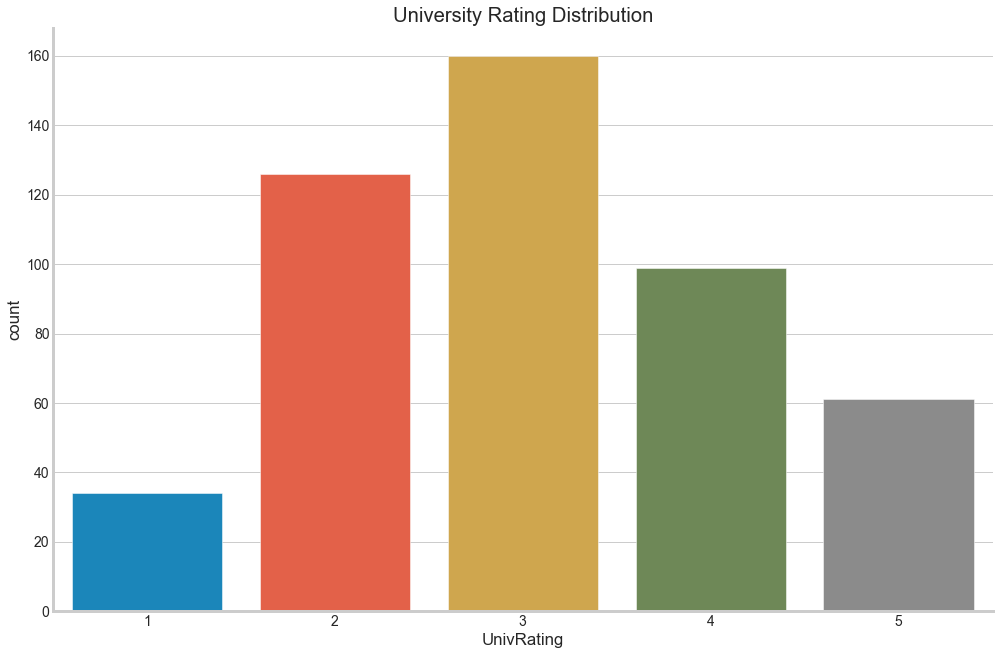

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data.UnivRating ,ax=ax)
sns.despine()

#Title
plt.title("University Rating Distribution");

### SOP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


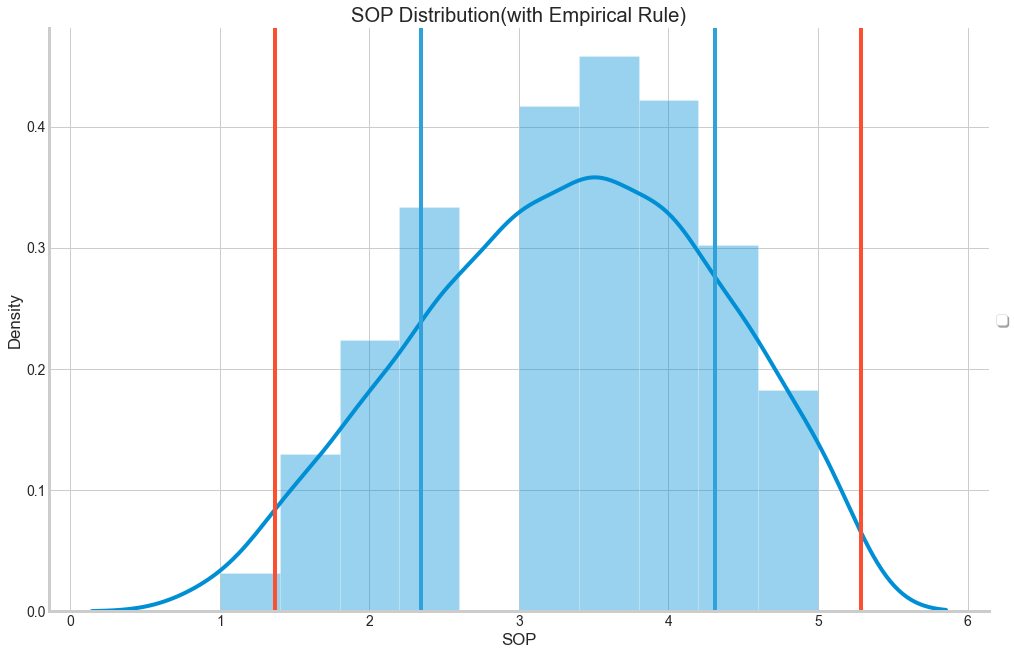

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.SOP,bins=10,ax=ax)
sns.despine()
std = data.SOP.std()
mean = data.SOP.mean()

#Title and legend
plt.title("SOP Distribution(with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fancybox=True, shadow=True);


#Limit lines
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

### LOR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


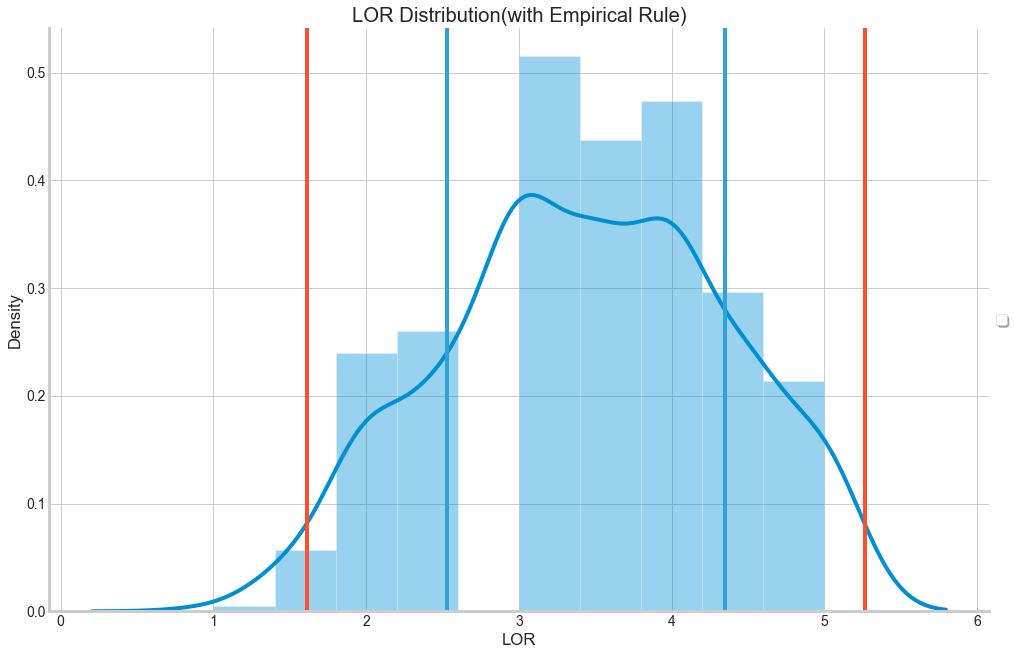

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.LOR,bins=10,ax=ax)
sns.despine()
std = data.LOR.std()
mean = data.LOR.mean()

#Title and legend
plt.title("LOR Distribution(with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fancybox=True, shadow=True);

#Limit line
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

### CGPA

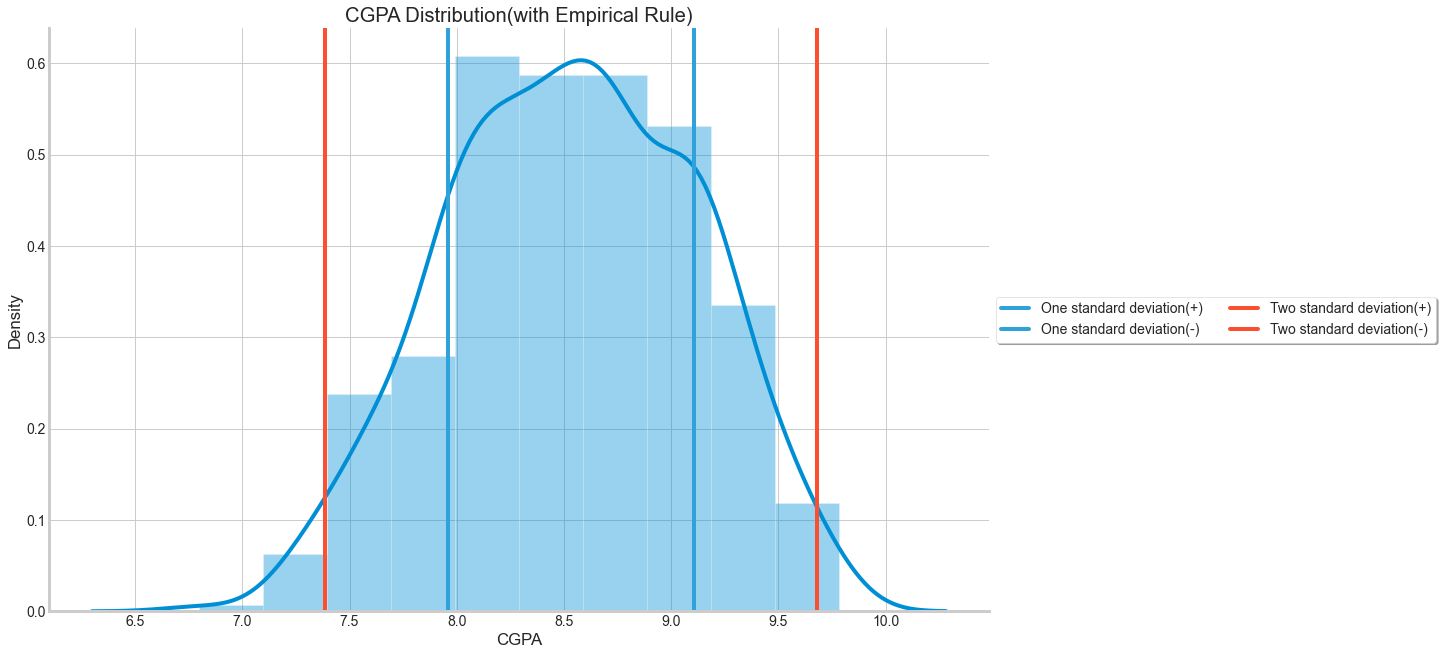

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.CGPA,bins=10,ax=ax)
sns.despine()
std = data.CGPA.std()
mean = data.CGPA.mean()

#Limit line
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

#Title and legend
plt.title("CGPA Distribution(with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fancybox=True, shadow=True);

### Research

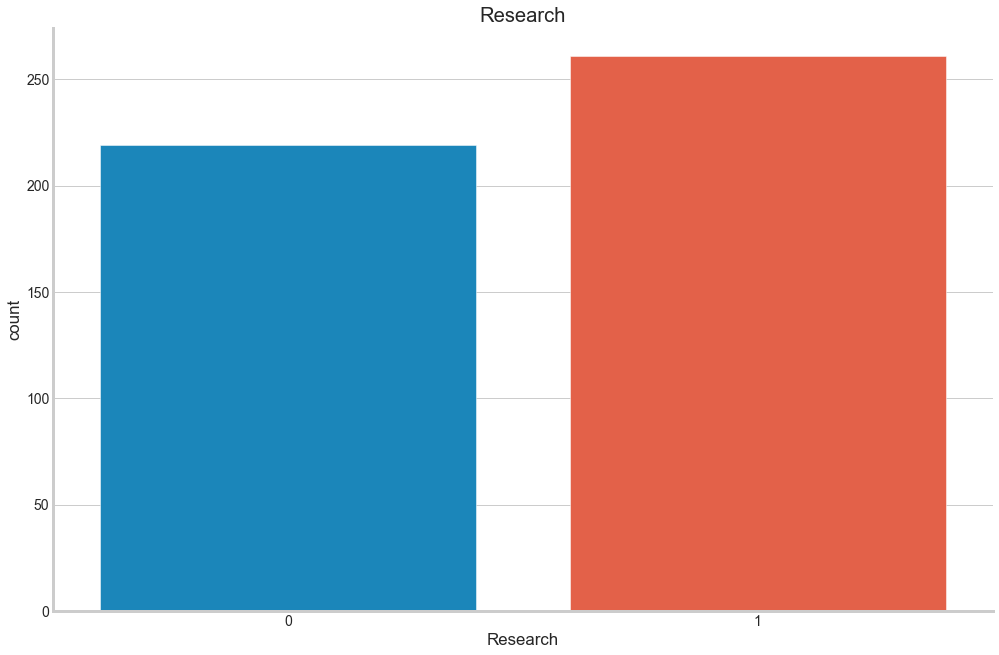

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data.Research,ax=ax)
sns.despine()
plt.title("Research");

### Chance of being admitted

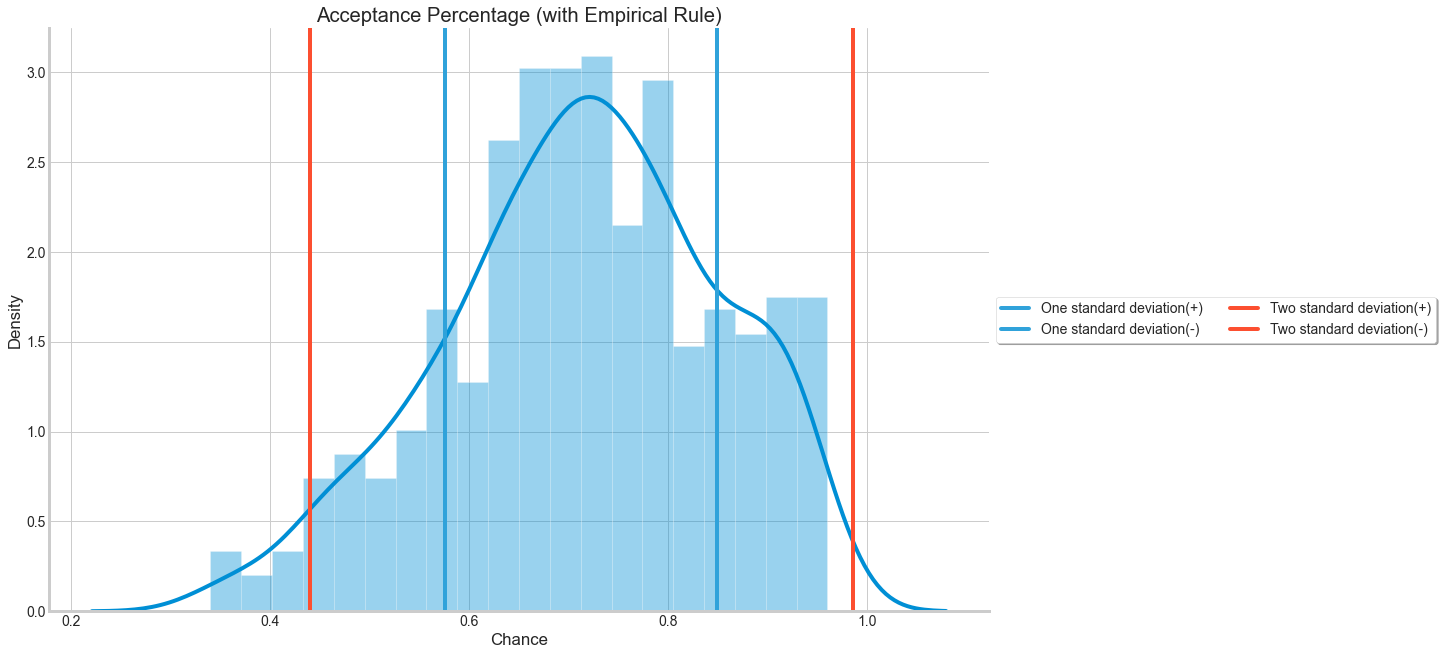

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(data.Chance,bins=20,ax=ax)
sns.despine()
std = data.Chance.std()
mean = data.Chance.mean()

#Limit lines
plt.axvline(mean+std,  label='One standard deviation(+)',c='#30a2da')
plt.axvline(mean-std,  label='One standard deviation(-)',c='#30a2da')

plt.axvline(mean+2*std,  label='Two standard deviation(+)',c='#fc4f30')
plt.axvline(mean-2*std,  label='Two standard deviation(-)',c='#fc4f30')

#Title and legend
plt.title("Acceptance Percentage (with Empirical Rule)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fancybox=True, shadow=True);


### Target Variable

Now we are going to add a categorical column in our dataset that indicates if a candidate is to be accepted or not.
We are goint to do so by stablishing a threshold of 75% (3rd quartile).

In [27]:
q3 = data.Chance.quantile(q=0.75)
data['High_Chance'] = data.Chance.apply(lambda x: 1 if x>= q3 else 0)

In [28]:
df = pd.DataFrame(data.High_Chance.value_counts()).reset_index()
df.columns = ['Outcome','Count']
df

Outcome  Count
0        0    358
1        1    122

In [29]:
df.Outcome = df.Outcome.map({0:'Not Accepted',1:'Accepted'})
df

Outcome  Count
0  Not Accepted    358
1      Accepted    122

In [30]:
fig = px.pie(df, values='Count', names='Outcome', color_discrete_sequence=px.colors.sequential.RdBu,hole=.7,title='GRE Acceptance Distribution',width=600,height=600)\
.update_traces(textposition='inside', textinfo='percent+label')\
.update_layout(legend={"itemclick":False})\
.update_layout(legend={"itemdoubleclick":False})\
.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()

We will now look for the population Mean for T-Test for CGPA

In [31]:
#Finding population Mean for T-Test
no_admt_population = data['CGPA'][data['High_Chance'] == 0]
admt_population = data['CGPA'][data['High_Chance']==1]
print(f"The mean CGPA for students who didnt get admission({no_admt_population.shape[0]}): " + str(no_admt_population.mean()))
print(f"The mean CGPA for students who got admission({admt_population.shape[0]}): " + str(admt_population.mean()) )

The mean CGPA for students who didnt get admission(358): 8.29829608938548
The mean CGPA for students who got admission(122): 9.220327868852458


In [32]:
# Conducting the T-Test
t_test = stats.ttest_1samp(a=admt_population,popmean = no_admt_population.mean())
print(f'T-Test Results:\n\tT-statistic: {round(t_test.statistic,2)}\n\tTwo-sided p-value: {t_test.pvalue}')

T-Test Results:
	T-statistic: 38.84
	Two-sided p-value: 3.5822676666961335e-70


In [33]:
# T-Test Quantile
degree_freedom = len(admt_population)
LQ = round(stats.t.ppf(0.025,degree_freedom),2)  # Left Quartile
RQ = round(stats.t.ppf(0.975,degree_freedom),2)  # Right Quartile
print (f'The t-distribution should be between {LQ} and {RQ}')
#print (f'As t-distribution is {round(t_test.statistic, 2)}')
if LQ < t_test.statistic and t_test.statistic > RQ:
    print('Hence, Null Hypothesis is Rejected')
else:
    print('Hence, Hypothesis is Accepted')

The t-distribution should be between -1.98 and 1.98
Hence, Null Hypothesis is Rejected


In [34]:
cgpa_range = sms.DescrStatsW(admt_population).tconfint_mean(alpha=.99)
print(f'We can say with 99% Confidence that CGPA of around {round(cgpa_range[0],2)} will certaily get you admitted.')

We can say with 99% Confidence that CGPA of around 9.22 will certaily get you admitted.



#### No we will now look for the population Mean for T-Test for GRE

In [35]:
#Finding population Mean for T-Test
no_admt_population = data['GRE'][data['High_Chance'] == 0]
admt_population = data['GRE'][data['High_Chance']==1]
print(f"The mean GRE for students who didnt get admission({no_admt_population.shape[0]}): " + str(no_admt_population.mean()))
print(f"The mean GRE for students who got admission({admt_population.shape[0]}): " + str(admt_population.mean()) )

The mean GRE for students who didnt get admission(358): 311.72067039106145
The mean GRE for students who got admission(122): 327.26229508196724


In [36]:
# Conducting the T-Test
t_test = stats.ttest_1samp(a=admt_population,popmean = no_admt_population.mean())
print(f'\n\nT-Test Results:\n\tT-statistic: {round(t_test.statistic,2)}\n\tTwo-sided p-value: {t_test.pvalue}\n\n')



T-Test Results:
	T-statistic: 29.94
	Two-sided p-value: 8.733095302363498e-58




In [37]:
# T-Test Quantile
degree_freedom = len(admt_population)
LQ = round(stats.t.ppf(0.025,degree_freedom),2)  # Left Quartile
RQ = round(stats.t.ppf(0.975,degree_freedom),2)  # Right Quartile
print (f'The t-distribution should be between {LQ} and {RQ}')

if LQ < t_test.statistic and t_test.statistic > RQ:
    print('Hence, Null Hypothesis is Rejected')
else:
    print('Hence, Hypothesis is Accepted')

The t-distribution should be between -1.98 and 1.98
Hence, Null Hypothesis is Rejected


In [38]:
cgpa_range = sms.DescrStatsW(admt_population).tconfint_mean(alpha=.99)
print(f'\n\nWe can say with 99% Confidence that GRE of around {round(cgpa_range[0],2)} will certaily get you admitted.')



We can say with 99% Confidence that GRE of around 327.26 will certaily get you admitted.



#### No we will now look for the population Mean for T-Test for TOEFL

In [39]:
#Finding population Mean for T-Test
no_admt_population = data['TOEFL'][data['High_Chance'] == 0]
admt_population = data['TOEFL'][data['High_Chance']==1]
print(f"The mean TOEFL for students who didnt get admission({no_admt_population.shape[0]}): " + str(no_admt_population.mean()))
print(f"The mean TOEFL for students who got admission({admt_population.shape[0]}): " + str(admt_population.mean()) )

The mean TOEFL for students who didnt get admission(358): 104.57262569832402
The mean TOEFL for students who got admission(122): 113.26229508196721


In [40]:
# Conducting the T-Test
t_test = stats.ttest_1samp(a=admt_population,popmean = no_admt_population.mean())
print(f'\n\nT-Test Results:\n\tT-statistic: {round(t_test.statistic,2)}\n\tTwo-sided p-value: {t_test.pvalue}\n\n')



T-Test Results:
	T-statistic: 27.47
	Two-sided p-value: 7.886159720927152e-54




In [41]:
# T-Test Quantile
degree_freedom = len(admt_population)
LQ = round(stats.t.ppf(0.025,degree_freedom),2)  # Left Quartile
RQ = round(stats.t.ppf(0.975,degree_freedom),2)  # Right Quartile
print (f'The t-distribution should be between {LQ} and {RQ}')

if LQ < t_test.statistic and t_test.statistic > RQ:
    print('Hence, Null Hypothesis is Rejected')
else:
    print('Hence, Hypothesis is Accepted')

The t-distribution should be between -1.98 and 1.98
Hence, Null Hypothesis is Rejected


In [42]:
cgpa_range = sms.DescrStatsW(admt_population).tconfint_mean(alpha=.99)
print(f'\n\nWe can say with 99% Confidence that TOEFL of around {round(cgpa_range[0],2)} will certaily get you admitted.')



We can say with 99% Confidence that TOEFL of around 113.26 will certaily get you admitted.


# Now let's try to answer some questions using the data

We will try to find interesting insights comparing pairs of columns and showcasting then in the x and y axes.

### Do high CGPA scores candidate more keen for Research?

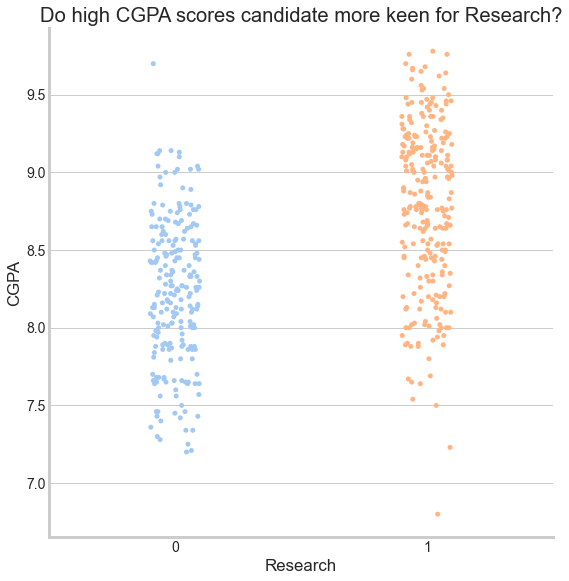

In [43]:
sns.catplot(x="Research", y="CGPA", height=8, data=data, kind="strip", palette ="pastel")
plt.title('Do high CGPA scores candidate more keen for Research?');

In [44]:
fig = px.box(data, x="Research", y="CGPA", points="all", color = "Research", 
             color_discrete_sequence=px.colors.sequential.RdBu, 
             #hover_data = ({data["research"]:False}),
             #labels = {"0": "No Reseach", "1":"Research"},
             title="Do high CGPA scores candidate more keen for Research?",
             #hoverinfo = None
            )


fig.update_layout(legend={"itemclick":False})
fig.update_layout(legend={"itemdoubleclick":False})
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.update_layout(plot_bgcolor="rgb(255,255,255)")
fig.show()

### Do high GRE scores candidate more keen for Research?

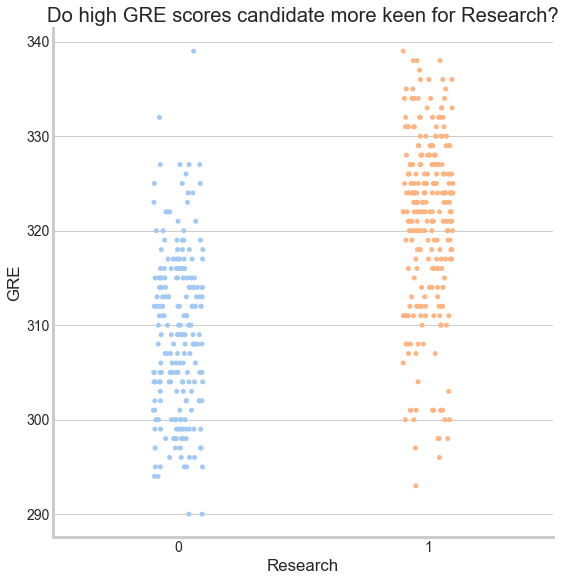

In [45]:
sns.catplot(x="Research", y="GRE", kind="strip", data=data, height=8, palette = "pastel")
plt.title('Do high GRE scores candidate more keen for Research?');

In [46]:
fig = px.box(data, 
             x="Research", 
             y="GRE", 
             points="all", 
             color="Research", 
             color_discrete_sequence=px.colors.sequential.RdBu, 
             #hover_data = ({data["research"]:False}),
             #labels = {"0": "No Reseach", "1":"Research"},
             title="Do high GRE scores candidate more keen for Research?",
             #hoverinfo = None
            )


fig.update_layout(legend={"itemclick":False})
fig.update_layout(legend={"itemdoubleclick":False})
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.update_layout(plot_bgcolor="rgb(255,255,255)")
fig.show()

### Can good TOEFL help you get good SOP Score?
Having a good TOEFL score should give you clear advantage in Verbal part of GRE.


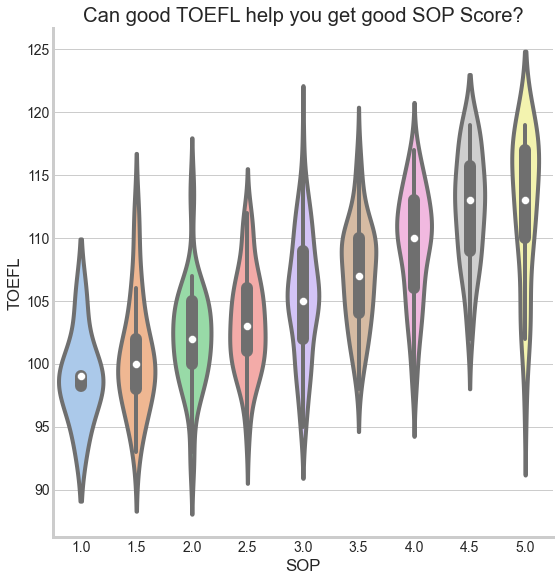

In [47]:
sns.catplot(x="SOP", y="TOEFL", kind="violin", data=data, height=8, palette="pastel")
plt.title('Can good TOEFL help you get good SOP Score?');

In [48]:
fig = go.Figure(data=go.Violin(y=data["TOEFL"],
                               x=data["SOP"],
                               box_visible=True, 
                               line_color='black',
                               meanline_visible=True, 
                               fillcolor='lightseagreen', 
                               opacity=0.6,
                               #color = data["SOP"]
                               ))
fig.update_layout(yaxis_zeroline=False)
fig.show()

In [49]:
fig = px.strip(data, 
               x='SOP', 
               y='TOEFL', 
               color = "SOP",
            
              )
fig.show()

In [50]:
fig = px.box(data, 
             x="SOP", 
             y="TOEFL",
             color="SOP", 
             points="all",
             color_discrete_sequence=px.colors.sequential.RdBu,
             title="Can good TOEFL help you get good SOP Score?",
             
            )
fig.update_layout(legend={"itemclick":False})
fig.update_layout(legend={"itemdoubleclick":False})
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.update_layout(plot_bgcolor="rgb(255,255,255)")
fig.show()

In [51]:
fig = px.violin(data, 
             x="SOP", 
             y="TOEFL",
             color="SOP", 
             points="all",
             color_discrete_sequence=px.colors.sequential.RdBu,
             title="Can good TOEFL help you get good SOP Score?",
             
            )
fig.update_layout(legend={"itemclick":False})
fig.update_layout(legend={"itemdoubleclick":False})
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.update_layout(plot_bgcolor="rgb(255,255,255)")
fig.show()

## Does being from Top Universities benefit candidates in SOP score?

Owing to exposure in top universities, Candidates have clear vision hence we can see higher score

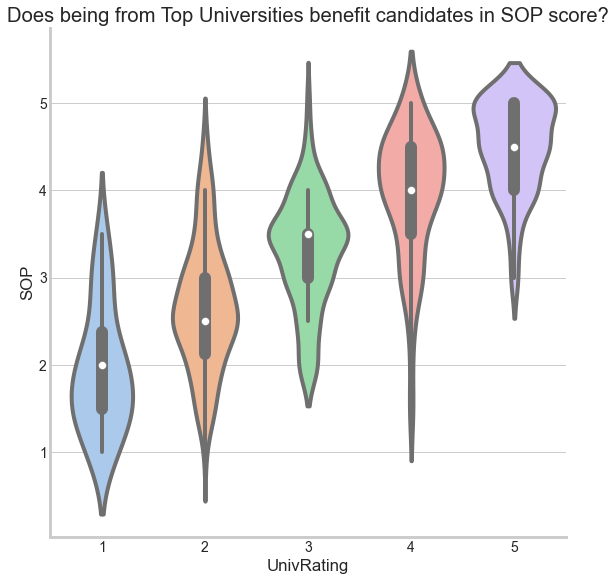

In [52]:
sns.catplot(x="UnivRating", y="SOP", kind="violin", data=data, height=8, palette = "pastel")
plt.title('Does being from Top Universities benefit candidates in SOP score?');

## Do being in Top Universities benefit you in LOR score?

Usually faculties of Top Universities are whose poeple who are well known in the community. Hence, LOR from them certainly counts.

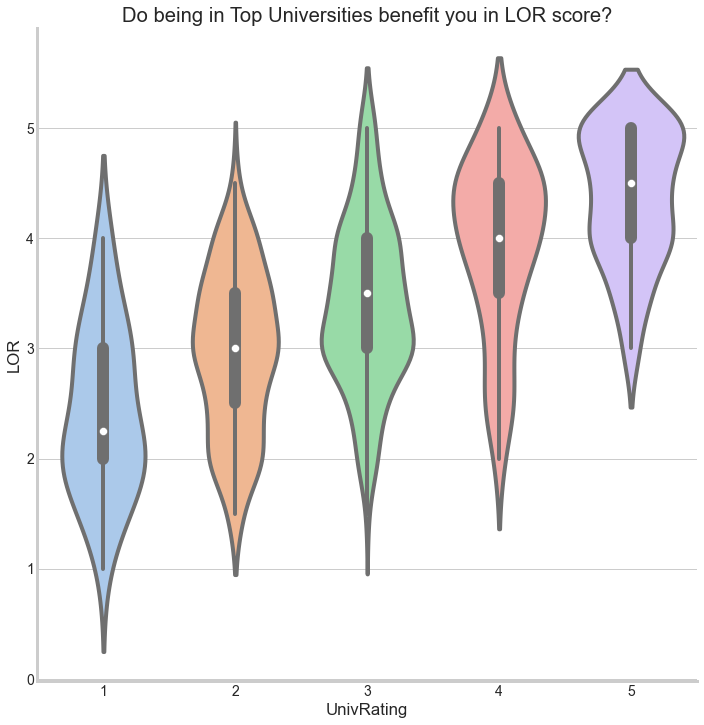

In [53]:
sns.catplot(x="UnivRating", y="LOR", kind="violin", data=data, height=10, palette = "pastel" )
plt.title('Do being in Top Universities benefit you in LOR score?');

### Do top Unis encourage Research?

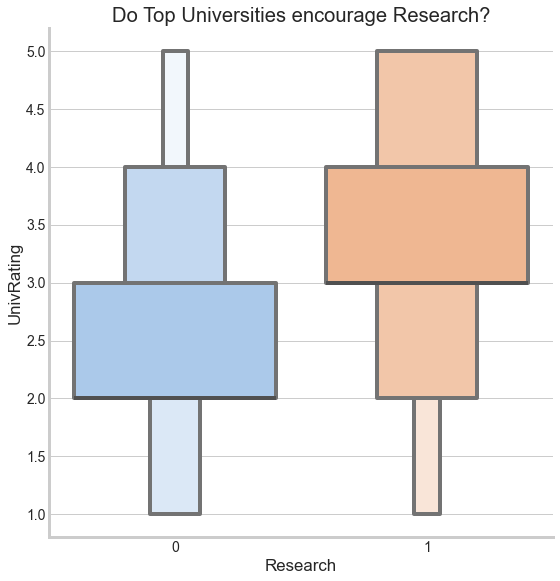

In [54]:
sns.catplot(x="Research", y="UnivRating", kind="boxen", data=data, height=8, palette="pastel")
plt.title('Do Top Universities encourage Research?');

## Can Research help in getting higher LOR Score?

Usually people in reseach domain have good contacts to guide them on their path to success.

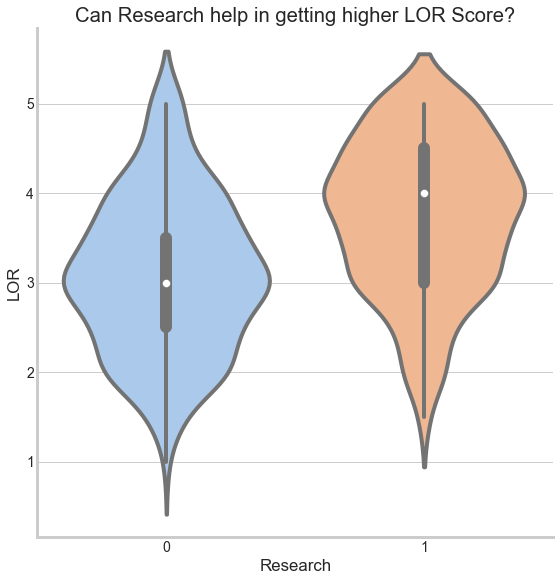

In [55]:
sns.catplot(x="Research", y="LOR", kind="violin", data=data, height=8, palette= "pastel")
plt.title('Can Research help in getting higher LOR Score?');

## Can research help in geting higher SOP Score?

Usually reseach oriented people have crystal clear roadmap to achieve their objective.


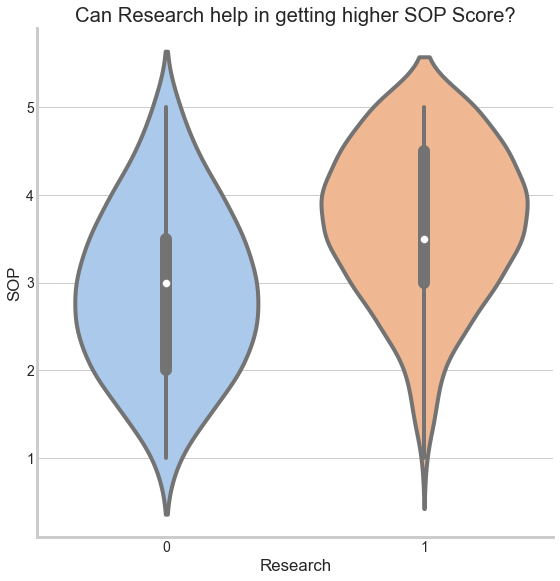

In [56]:
sns.catplot(x="Research", y="SOP", kind="violin", data=data, height=8, palette="pastel")
plt.title('Can Research help in getting higher SOP Score?');

## Can Uni Rating Increment or Decrement your chances of getting accepted?

- University Rating = 1, will certainly be rejected.
- University Rating = 2-3, are mostly rejected.
- University Rating = 4, has a 50-50 chance of being accpeted.
- University Rating = 5, has a high chance of getting accpeted.

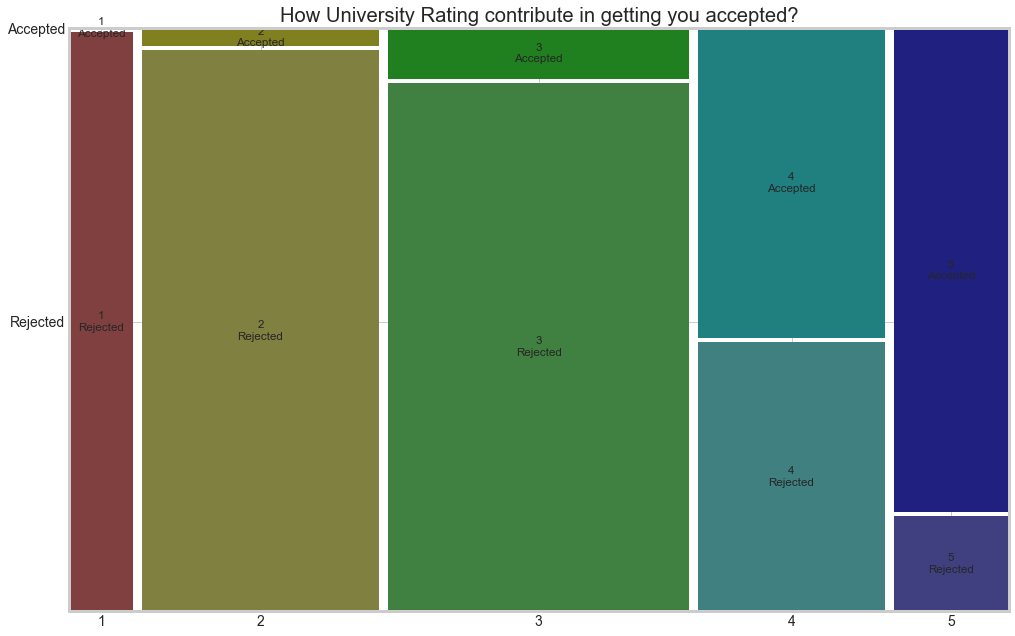

In [57]:
df = data.copy()
df.Research = df.Research.map({1:'Research',0:'No Research'})
df.High_Chance = df.High_Chance.map({1:'Accepted',0:'Rejected'})

fig, ax = plt.subplots(figsize=(15, 10))
mosaic(df.sort_values('UnivRating'),['UnivRating','High_Chance'], gap=0.01, title='How University Rating contribute in getting you accepted?',ax=ax);


## Can Research help you getting accepted?

- Participate with Research exposure usually have close to 50-50 chance of getting accepted.
- Participate with no Research exposure are mostly to be rejected

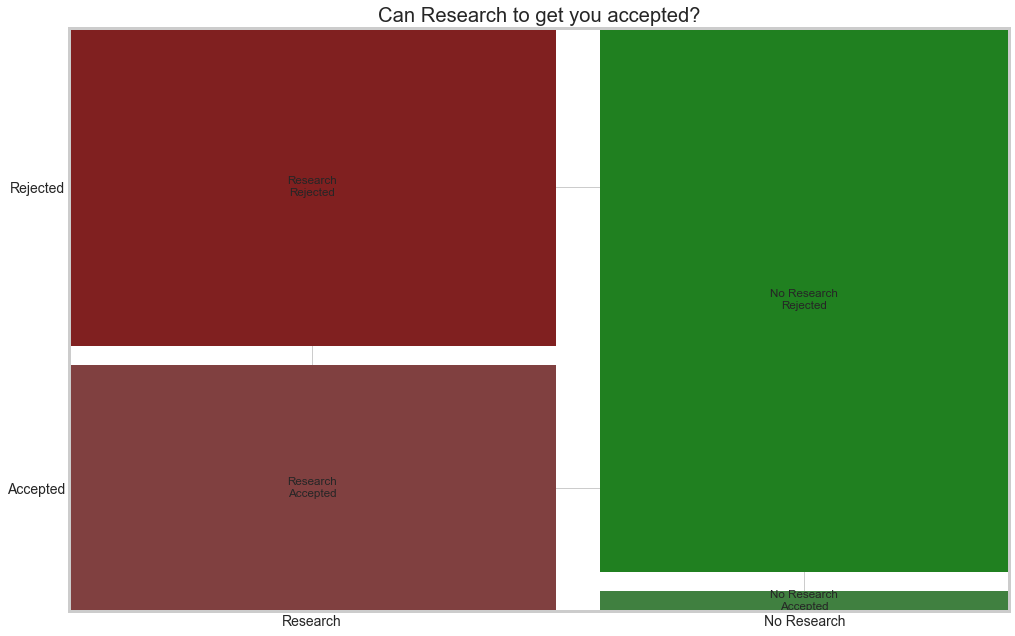

In [58]:
fig, ax = plt.subplots(figsize=(15, 10))
mosaic(df,['Research','High_Chance'], gap=0.05, title='Can Research to get you accepted?',ax=ax);

In [59]:
fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(name = key,
                     y = data[key],
                     x = np.cumsum(widths) - widths,
                     width = widths, offset = 0,
                     marker = {'color' : colors[key]},
                     customdata = data[key],
                     texttemplate = "%{y:.2f}",
                     textposition = "inside",
                     textangle = 0,textfont_color = "white",
                     textfont_size = 30))
    
    fig.update_layout(title_text ="Sales of Consoles per Region",
                  barmode = "stack",
                  title_font_size  = 40,legend_font_size = 30,
                  width = 1400, height = 1400)
    
    fig.update_xaxes(title_text=
                 'Width of each bar=Sales of Nintendo in MM',
                 range = [0, x_width],  
                 title_font_size = 30,                   
                 tickvals = np.cumsum(widths)-widths/2,
                 ticktext =["%s<br>%d"% l, w)for l,w 
                            in zip(labels, widths)],
                 tickfont = dict(family='Calibri', 
                                color='black', size=25))
    fig.update_yaxes(title_text = 'Percentage (%)',
                 range = [0,100],
                 title_font=dict(size=35,
                                 family='Verdana', color='darkred'))
    fig.write_image(path + "figmarimekko1.png")
fig.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1131314359.py, line 24)

# Data processing

In [60]:
data

GRE  TOEFL  UnivRating  SOP  LOR  CGPA  Research  Chance  High_Chance
0    337.0  118.0           4  4.5  4.5  9.65         1    0.92            1
1    324.0  107.0           4  4.0  4.5  8.87         1    0.76            0
2    316.0  104.0           3  3.0  3.5  8.00         1    0.72            0
3    322.0  110.0           3  3.5  2.5  8.67         1    0.80            0
4    314.0  103.0           2  2.0  3.0  8.21         0    0.65            0
..     ...    ...         ...  ...  ...   ...       ...     ...          ...
493  300.0   95.0           2  3.0  1.5  8.22         1    0.62            0
494  301.0   99.0           3  2.5  2.0  8.45         1    0.68            0
495  332.0  108.0           5  4.5  4.0  9.02         1    0.87            1
498  312.0  103.0           4  4.0  5.0  8.43         0    0.73            0
499  327.0  113.0           4  4.5  4.5  9.04         0    0.84            1

[480 rows x 9 columns]